# **Short Course on Deep Learning and Convolutional Neural Network**
# **@VIT Chennai**



## Introduction to Image Processing in OpenCV

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene, find similar images from an image database, remove red eyes from images taken using flash, follow eye movements, recognize scenery and establish markers to overlay it with augmented reality, etc. 
It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. OpenCV leans mostly towards real-time vision applications and takes advantage of MMX and SSE instructions when available. A full-featured CUDAand OpenCL interfaces are being actively developed right now. 

Source: https://opencv.org/about.html

## What is image & pixel?

Computer considers an image as a matrix; each value in the matrix represents a single pixel. A pixel is a basic building block of an image. A pixel has a value between 0 and 255, whereas the value of 0 represents complete black and 255 represent complete white. The shade of the color varies between 0 and 255 to show various. Similarly, a pixel in RGB image is represented by tuple such as (red, green, blue)

What is the color of the image having a value of (255,255,255)?   



In [7]:
# import the packages required 
# CV2 is the package used for image processing
import cv2    
# matplotlib is plotting library used for displaying images
import matplotlib.pyplot as plt  
# Numpy is for matrix computation
import numpy as np
from IPython.display import display, HTML, clear_output
print(cv2.__version__)

4.1.2


## Connecting to Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Change the directory to "VIT-DL-ShortCourse/Day1/Lab1/"

In [9]:
cd /content/gdrive/My Drive/VIT-DL-ShortCourse/Day1/Lab1/OpenCV/dataset

/content/gdrive/My Drive/VIT-DL-ShortCourse/Day1/Lab1/OpenCV/dataset


### Reading a Image using imread() function
load the image
img= cv2.imread(path to image)

In [0]:
img=cv2.imread('lena.png')

In [11]:
if img is None:
    print('Image not found')
else:
    print('Image Loaded')

Image Loaded


### Display information about image

Images are read as a numpy array. The shape method gives us essential information about image such as size etc.



In [12]:
print(img.shape)
print(img.dtype)
print(img.shape[0])
print(img.shape[1])

(512, 512, 3)
uint8
512
512


### Display image

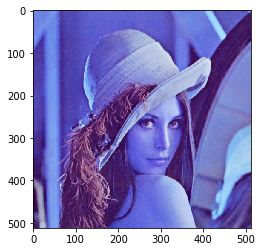

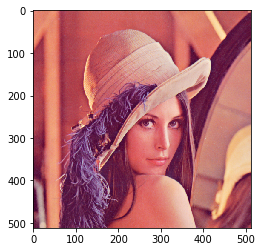

In [13]:
# plt read images in RGB format while CV2 reads images in BGR format.
plt.imshow(img)
plt.show()
# convert BGR to RGB
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [14]:
# can we grab a pixel value at [0,0]

print(img[0,0])


[125 137 226]


### Save image to the disk

In this example an image is read from folder and converted to gray-level image and finally saved to the disk as a new image using 

#### cv2.imwrite("image name", image).

True

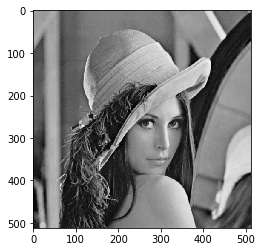

In [15]:
input_image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
cv2.imwrite('Saved_image.png',input_image)


### Subplot

Subplot can be used to plot multiple plots in a grid of a given size.


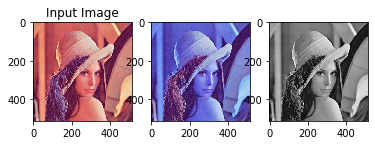

In [16]:
ax1 = plt.subplot(1,3,1)
plt.title("Input Image")
plt.imshow(img_rgb)
ax2 = plt.subplot(1,3,2)
plt.imshow(img)
ax3=plt.subplot(1,3,3)
plt.imshow(input_image, cmap='gray')  

### Splitting an image into its channels
This example shows about splitting an image into channels. With the use of subplot, the original image and its corresponding channels are plotted. 

**What do the plots show?**

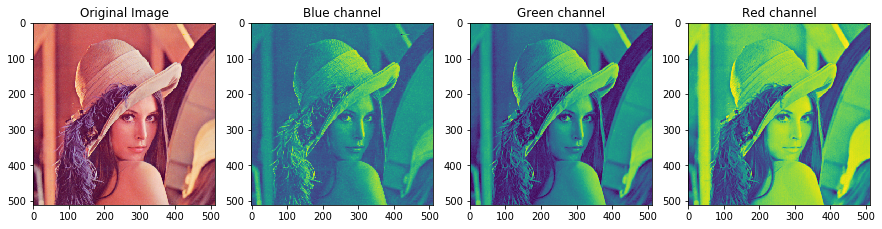

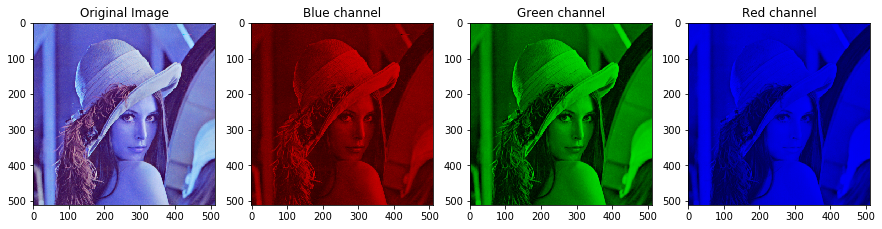

In [17]:
img=cv2.imread('lena.png')
plt.figure(figsize=(15,15))
ax1 = plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img_rgb)

ax2 = plt.subplot(1,4,2)
blue=img[:,:,0]
plt.title("Blue channel")
plt.imshow(blue)
##
ax3=plt.subplot(1,4,3)
green=img[:,:,1]
plt.title("Green channel")
plt.imshow(green)
##
ax4=plt.subplot(1,4,4)
red=img[:,:,2]
plt.title("Red channel")
plt.imshow(red)


##############################################################################
img_rg=cv2.imread('lena.png')

plt.figure(figsize=(15,15))
ax5 = plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img_rg)


b = img_rg.copy()
b[:, :, 1] = 0
b[:, :, 2] = 0
ax5 = plt.subplot(1,4,2)
plt.title("Blue channel")
plt.imshow(b)
##

g = img_rg.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0
ax7=plt.subplot(1,4,3)
plt.title("Green channel")
plt.imshow(g)
##
r = img_rg.copy()
r[:, :, 0] = 0
r[:, :, 1] = 0
ax8=plt.subplot(1,4,4)
plt.title("Red channel")
plt.imshow(r)

In [0]:
zeros = np.zeros(img_rg.shape[:2], dtype = "uint8")


### Tasks: 

Read test image from the folder and separate its channels into Red, Green, and Blue

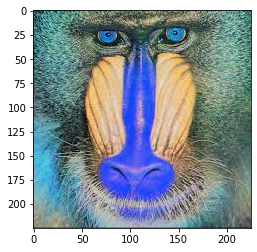

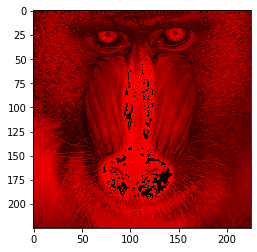

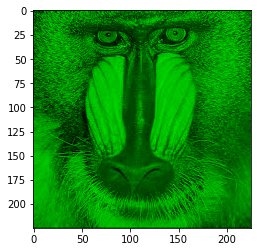

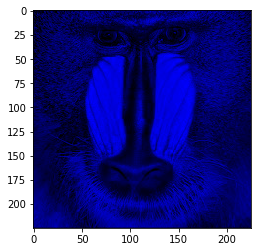

In [19]:

# Read test.jpeg from folder
img_test=cv2.imread('test.jpeg')
# Display the orginal image in BGR and RGB using the appropriate functions
zeros = np.zeros(img_test.shape[:2], dtype = "uint8")

#split the image into channels using built-in function cv2.split
(B, G, R) = cv2.split(img_test)

plt.imshow(img_test)
plt.show()

# show the separate channels

red=cv2.merge([zeros, zeros, np.add(R,10)])
red=cv2.cvtColor(red, cv2.COLOR_BGR2RGB)
plt.imshow(red)
plt.show()

green=cv2.merge([zeros, G, zeros])
plt.imshow(green)
plt.show()

blu=cv2.merge([B, zeros, zeros])
blu=cv2.cvtColor(blu, cv2.COLOR_BGR2RGB)
plt.imshow(blu)
plt.show()



### Thresholding - Binarization


In simple thresholding example, a manual value of threshold T is set to binarize the image. This pixel values greater than T are set to 255 while values less than T is set to 0. The threshold value is considered using a trial and error method.

In [0]:
# 1 Read in image

coins = cv2.imread('coins1.jpg')

# 2 Convert RGB to Gray-level
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

# preprocessing the image with GaussianBlur
#coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

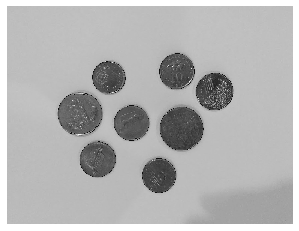

In [21]:
plt.imshow(coins_gray, cmap='gray')
plt.axis('off')
plt.show()

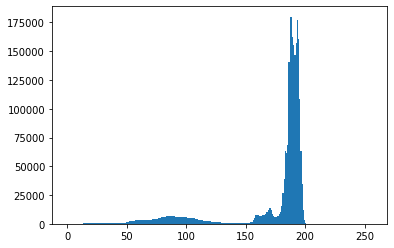

In [22]:
plt.hist(coins.ravel(),256,[0,256]);
#plt.axis('off')
plt.show()

### Command for thresholding (Manual Thresholding)

**cv2.threshold(img,127,255,cv2.THRESH_BINARY)** where

1.   First argument is img: which is gray-scale image
2.   Second argument is T (Threshold value)
3.  Third argument Third argument is the maxVal which 
represents the value to be given if pixel value is more than the threshold value.

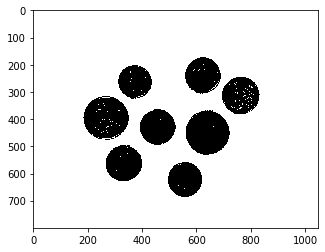

In [28]:
 (T, thresh) = cv2.threshold(coins_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

### Automatic Thresholding
Otsu method is the way of automatic thresholding, where threshold value T is optimally found by the Otsu.

Optimal threshold value:  139.0


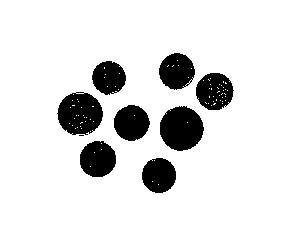

In [29]:

(T, threshotsu) = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_OTSU)
print("Optimal threshold value: ", T)
plt.imshow(threshotsu, cmap='gray')
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

### Edge detection in images

Edge detection is the process of finding edges in images. The Sobel edge detector is one of the edge detection method, which actually uses two kernels: one for detecting horizontal changes in direction and the other for detecting vertical changes in direction.


gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0, 5)

gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1,5)

Both gX and gY are float type, for visualization it is required to convert it 


**cv2.Sobel(original_image,ddepth,xorder,yorder,kernelsize)**

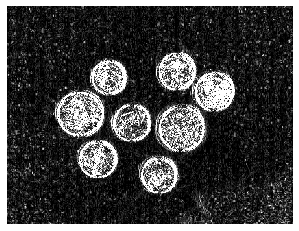

In [30]:
sobelx = cv2.Sobel(coins_gray,cv2.CV_64F,1,0,ksize=5)
gX = cv2.convertScaleAbs(sobelx)
plt.imshow(gX, cmap='gray')
plt.axis('off')
plt.show()

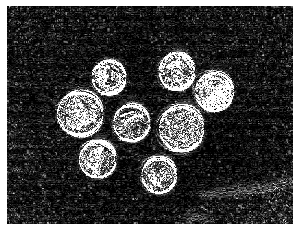

In [31]:
sobely = cv2.Sobel(coins_gray,cv2.CV_64F,0,1,ksize=5)
gY = cv2.convertScaleAbs(sobely)
plt.imshow(gY, cmap='gray')
plt.axis('off')
plt.show()


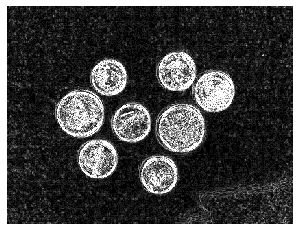

In [32]:
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
plt.imshow(sobelCombined, cmap='gray')
plt.axis('off')
plt.show()